Dataset saved to 'electricity_data_india.csv'

Model Results:
Coefficient (Slope): 7.94
Intercept: -476.44

Accuracy Metrics:
Training MSE: 82628.83
Test MSE: 53149.08
Training RMSE: 287.45
Test RMSE: 230.54
Training MAE: 224.78
Test MAE: 191.99
Training MAPE: 46.67%
Test MAPE: 51.88%
Training R²: 0.9770
Test R²: 0.9844

Sample Predictions:
For 1 kWh, predicted bill: Rs 40.00
For 10 kWh, predicted bill: Rs 40.00
For 75 kWh, predicted bill: Rs 118.88
For 150 kWh, predicted bill: Rs 714.20
For 350 kWh, predicted bill: Rs 2301.72
For 600 kWh, predicted bill: Rs 4286.12


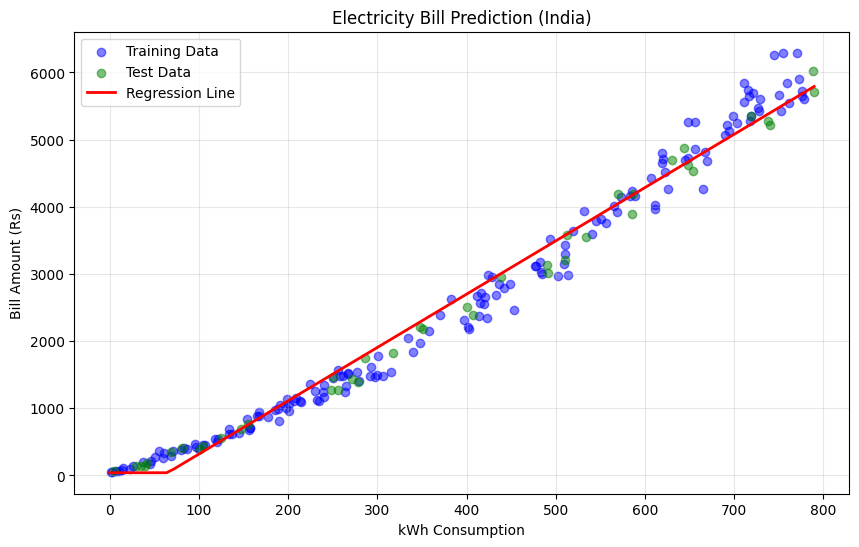


Visualization saved as 'electricity_bill_prediction.png'


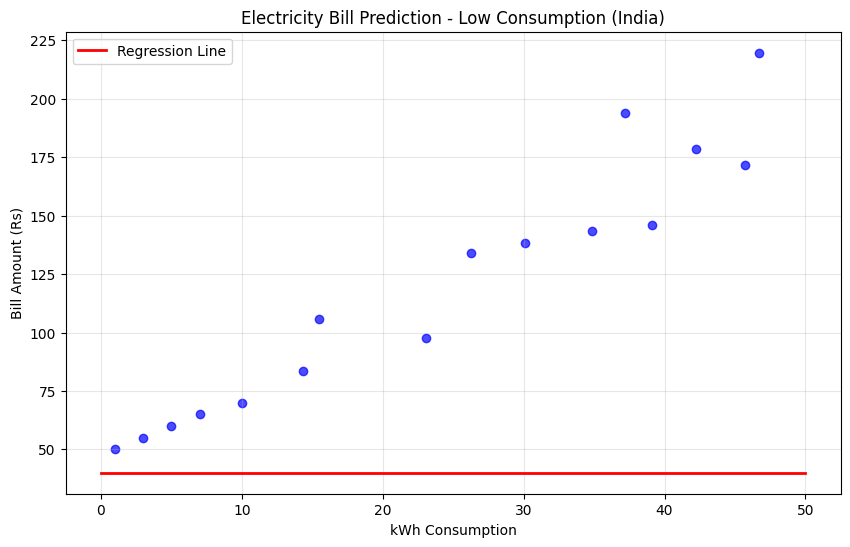

Low consumption visualization saved as 'low_consumption_prediction.png'

Starting interactive prediction mode

=== Electricity Bill Predictor ===
This model predicts electricity bills based on kWh consumption in India



Enter your electricity consumption in kWh (or 'q' to quit):  200



Prediction Result:
kWh Consumption: 200.00
Predicted Bill Amount: Rs 1111.08
(This falls in the mid-range tariff slab in most Indian states)

=== Electricity Bill Predictor ===
This model predicts electricity bills based on kWh consumption in India



Enter your electricity consumption in kWh (or 'q' to quit):  1



Prediction Result:
kWh Consumption: 1.00
Predicted Bill Amount: Rs 40.00
(Even with minimal consumption, there are fixed charges in most Indian states)

=== Electricity Bill Predictor ===
This model predicts electricity bills based on kWh consumption in India



Enter your electricity consumption in kWh (or 'q' to quit):  20



Prediction Result:
kWh Consumption: 20.00
Predicted Bill Amount: Rs 40.00
(This falls in the lowest tariff slab in most Indian states)

=== Electricity Bill Predictor ===
This model predicts electricity bills based on kWh consumption in India



Enter your electricity consumption in kWh (or 'q' to quit):  50



Prediction Result:
kWh Consumption: 50.00
Predicted Bill Amount: Rs 40.00
(This falls in the lowest tariff slab in most Indian states)

=== Electricity Bill Predictor ===
This model predicts electricity bills based on kWh consumption in India



Enter your electricity consumption in kWh (or 'q' to quit):  80



Prediction Result:
kWh Consumption: 80.00
Predicted Bill Amount: Rs 158.57
(This falls in the lowest tariff slab in most Indian states)

=== Electricity Bill Predictor ===
This model predicts electricity bills based on kWh consumption in India



Enter your electricity consumption in kWh (or 'q' to quit):  q


Exiting interactive prediction mode.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Generate a synthetic dataset based on typical Indian electricity tariffs
def generate_electricity_dataset(n_samples=100, seed=42):
    np.random.seed(seed)
    
    # Generate kWh consumption data ranging from 10 to 800 kWh
    # Changed minimum from 50 to 10 to better handle low consumption values
    kwh = np.random.uniform(10, 800, n_samples)
    
    # Create bill amounts with different slabs (approximating Indian tariff structure)
    bill = np.zeros_like(kwh)
    
    # Apply slab rates (these are approximations of typical Indian tariff structures)
    # 0-100 kWh: Rs 3-4 per unit
    # 101-300 kWh: Rs 5-7 per unit
    # 301-500 kWh: Rs 7-9 per unit
    # Above 500 kWh: Rs 9-11 per unit
    
    for i, consumption in enumerate(kwh):
        if consumption <= 100:
            rate = np.random.uniform(3, 4)
            bill[i] = consumption * rate
        elif consumption <= 300:
            rate = np.random.uniform(5, 7)
            bill[i] = 100 * np.random.uniform(3, 4) + (consumption - 100) * rate
        elif consumption <= 500:
            rate = np.random.uniform(7, 9)
            bill[i] = 100 * np.random.uniform(3, 4) + 200 * np.random.uniform(5, 7) + (consumption - 300) * rate
        else:
            rate = np.random.uniform(9, 11)
            bill[i] = 100 * np.random.uniform(3, 4) + 200 * np.random.uniform(5, 7) + 200 * np.random.uniform(7, 9) + (consumption - 500) * rate
    
    # Add fixed charges (common in Indian electricity bills)
    # Add smaller fixed charges for low consumption
    for i, consumption in enumerate(kwh):
        if consumption < 50:
            fixed_charges = np.random.uniform(20, 50)
        else:
            fixed_charges = np.random.uniform(50, 150)
        bill[i] += fixed_charges
    
    # Add some random noise to make it more realistic
    bill += np.random.normal(0, bill * 0.03)  # 3% noise
    
    # Create a DataFrame
    data = pd.DataFrame({
        'kwh_consumption': kwh,
        'bill_amount': bill
    })
    
    return data

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Generate dataset
data = generate_electricity_dataset(n_samples=200)

# Add some very low consumption examples to improve model performance at low values
low_consumption_data = pd.DataFrame({
    'kwh_consumption': [1, 3, 5, 7, 10],
    'bill_amount': [50, 55, 60, 65, 70]  # Minimum fixed charges even for tiny consumption
})

# Combine the datasets
data = pd.concat([data, low_consumption_data], ignore_index=True)

# Save the dataset to a CSV file
data.to_csv('electricity_data_india.csv', index=False)
print("Dataset saved to 'electricity_data_india.csv'")

# Split the data into training and testing sets
X = data[['kwh_consumption']]
y = data['bill_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model with multiple accuracy metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\nModel Results:")
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"\nAccuracy Metrics:")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Predict bill for a new kWh value
def predict_bill(kwh):
    prediction = model.predict([[kwh]])[0]
    
    # Ensure prediction is never negative or unrealistically low
    # Minimum bill amount is typically around 40-50 rupees in most states
    if prediction < 40:
        return 40.0
    return prediction

# Example predictions
sample_kwh_values = [1, 10, 75, 150, 350, 600]
print("\nSample Predictions:")
for kwh in sample_kwh_values:
    predicted_bill = predict_bill(kwh)
    print(f"For {kwh} kWh, predicted bill: Rs {predicted_bill:.2f}")

# Visualize the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Test Data')

# Plot the regression line
x_range = np.linspace(0, max(data['kwh_consumption']), 100)
y_range = np.array([predict_bill(x) for x in x_range])  # Use predict_bill to ensure floor value
plt.plot(x_range, y_range, color='red', linewidth=2, label='Regression Line')

plt.title('Electricity Bill Prediction (India)')
plt.xlabel('kWh Consumption')
plt.ylabel('Bill Amount (Rs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('electricity_bill_prediction.png')
plt.show()

print("\nVisualization saved as 'electricity_bill_prediction.png'")

# Plot a zoomed-in view for low consumption values
plt.figure(figsize=(10, 6))
low_range_mask = data['kwh_consumption'] <= 50
plt.scatter(data.loc[low_range_mask, 'kwh_consumption'], 
           data.loc[low_range_mask, 'bill_amount'], 
           color='blue', alpha=0.7)

# Plot the regression line for low values
x_low_range = np.linspace(0, 50, 50)
y_low_range = np.array([predict_bill(x) for x in x_low_range])
plt.plot(x_low_range, y_low_range, color='red', linewidth=2, label='Regression Line')

plt.title('Electricity Bill Prediction - Low Consumption (India)')
plt.xlabel('kWh Consumption')
plt.ylabel('Bill Amount (Rs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('low_consumption_prediction.png')
plt.show()

print("Low consumption visualization saved as 'low_consumption_prediction.png'")

# Get input from user and predict bill
def get_user_input():
    print("\n=== Electricity Bill Predictor ===")
    print("This model predicts electricity bills based on kWh consumption in India")
    
    while True:
        try:
            user_input = input("\nEnter your electricity consumption in kWh (or 'q' to quit): ")
            
            if user_input.lower() == 'q':
                return None
            
            kwh = float(user_input)
            
            if kwh < 0:
                print("Error: kWh cannot be negative. Please enter a positive number.")
                continue
                
            return kwh
            
        except ValueError:
            print("Error: Please enter a valid number for kWh consumption.")

# Interactive prediction loop
def interactive_prediction():
    print("\n" + "="*50)
    print("Starting interactive prediction mode")
    print("="*50)
    
    while True:
        kwh = get_user_input()
        
        if kwh is None:
            print("Exiting interactive prediction mode.")
            break
            
        predicted_bill = predict_bill(kwh)
        
        print(f"\nPrediction Result:")
        print(f"kWh Consumption: {kwh:.2f}")
        print(f"Predicted Bill Amount: Rs {predicted_bill:.2f}")
        
        # Provide some context based on the consumption level
        if kwh < 10:
            print("(Even with minimal consumption, there are fixed charges in most Indian states)")
        elif kwh <= 100:
            print("(This falls in the lowest tariff slab in most Indian states)")
        elif kwh <= 300:
            print("(This falls in the mid-range tariff slab in most Indian states)")
        elif kwh <= 500:
            print("(This falls in the higher tariff slab in most Indian states)")
        else:
            print("(This falls in the highest tariff slab in most Indian states)")

# Run the interactive prediction loop at the end of the script
interactive_prediction()